In [122]:
from skimage.util import img_as_ubyte
from skimage.io import imread, imsave

from skimage.morphology import erosion, dilation
from skimage.filters import threshold_otsu
from skimage.util import pad


from skimage import measure
from skimage import filters

import numpy as np

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline

# dejunkify function which acts on non-binarized images

In [144]:
def dejunkify(img: np.ndarray, 
              padding: int = 5,
              thicken: bool = True,
              multiplicative_safety_factor: float = 0.3) -> np.ndarray:
    """Do a few transformations to remove junk from an image of text or digits.
    
    Args:
        img: The input image, with background values 255.
        crop: True to crop the doctored image to region of interest.
        padding: Padding pixels for the tight crop, if it is used.
        thicken: True to slightly enlarge and thicken the image.
        multiplicative_safety_factor: Factor by which a junk component 
            is smaller than the mean of all components.
    
    NOTE: Background must be white 255.
    
    """
    
    bkg_value = 255
    
    # enlarge the black areas of the image slightly
    im = erosion(img)
    
    # find connected components in the image
    blobs = im < threshold_otsu(im)
    labels = measure.label(blobs)

    
    # find the tiny components that seem like possible junk
    label_counts = np.bincount(labels.flatten())
    label_counts_no_bkg = label_counts[1:]
    cutoff = np.mean(label_counts_no_bkg) * multiplicative_safety_factor
    junk_labels = np.unique(labels)[np.where(label_counts < cutoff)[0]]
    
    # set the labels of the artifact to zero 
    new_labels = labels.copy()
    for k in junk_labels:
        new_labels[labels==k] = 0
    
    # remove artifact from image by filling with background
    im_no_artifact = img.copy()
    im_no_artifact[new_labels == 0] = bkg_value #set background to white
    
    # find the larget Bounding box which include all the remaining blobs and do padding
    min_row, min_col, max_row, max_col = [],[],[],[]
    for region in measure.regionprops(new_labels):
        a,b,c,d = region.bbox
        min_row.append(a)
        min_col.append(b)
        max_row.append(c)
        max_col.append(d)
    cropped_im = im_no_artifact[min(min_row):max(max_row),min(min_col):max(max_col)]
    padded_im = pad(cropped_im, pad_width=padding, mode='constant', constant_values=bkg_value)

    if thicken:
        return erosion(padded_im)
    else:
        return padded_im

# Test

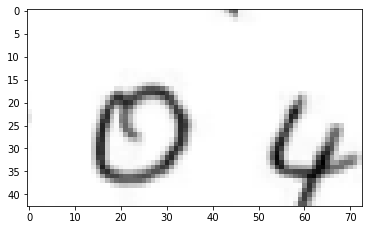

In [145]:
img = imread('/home/jupyter/image_registration/cropped_imgs/numeric_1_date_of_birth_day.png')
plt.imshow(img, cmap='gray')

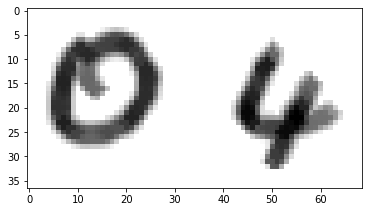

In [146]:
plt.imshow(dejunkify(img, thicken=True, multiplicative_safety_factor=0.7), cmap='gray')

# Run through all the examples!!

In [147]:
import glob
import subprocess

numeric_files = glob.glob('/home/jupyter/image_registration/cropped_imgs/numeric*')
numeric_files[:5]

['/home/jupyter/image_registration/cropped_imgs/numeric_3_physician_phone_number.png',
 '/home/jupyter/image_registration/cropped_imgs/numeric_3_speciman_collection_date_month.png',
 '/home/jupyter/image_registration/cropped_imgs/numeric_3_date_of_birth_day_doctored.png',
 '/home/jupyter/image_registration/cropped_imgs/numeric_2_physician_phone_number.png',
 '/home/jupyter/image_registration/cropped_imgs/numeric_2_speciman_collection_date_minute.png']

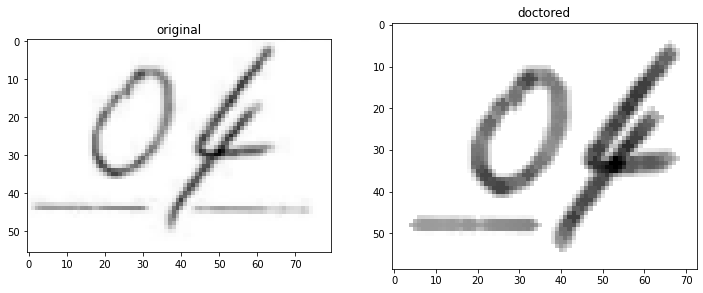

Command:
python /home/jupyter/SimpleHTR/src/main.py --file /home/jupyter/image_registration/cropped_imgs/numeric_3_speciman_collection_date_month_doctored.png --wordbeamsearch --char /home/jupyter/SimpleHTR/test/numerals.txt --corpus /home/jupyter/SimpleHTR/test/months.txt
Output:
Recognized: "Dt"
Probability: 0.19483799

Best semi-hacky prediction: 04





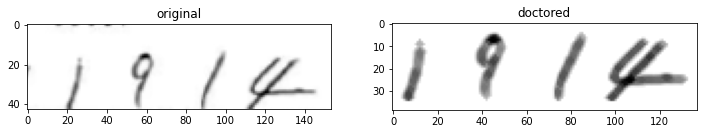

Command:
python /home/jupyter/SimpleHTR/src/main.py --file /home/jupyter/image_registration/cropped_imgs/numeric_3_date_of_birth_year_doctored.png --wordbeamsearch --char /home/jupyter/SimpleHTR/test/numerals.txt --corpus /home/jupyter/SimpleHTR/test/years.txt
Output:
Recognized: "1914"
Probability: 0.27072948

Best semi-hacky prediction: 1914





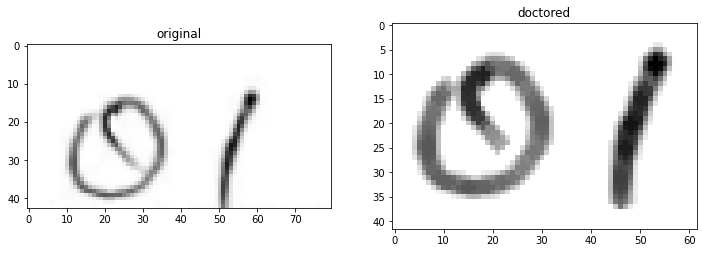

Command:
python /home/jupyter/SimpleHTR/src/main.py --file /home/jupyter/image_registration/cropped_imgs/numeric_4_date_of_birth_month_doctored.png --wordbeamsearch --char /home/jupyter/SimpleHTR/test/numerals.txt --corpus /home/jupyter/SimpleHTR/test/months.txt
Output:
Recognized: "or"
Probability: 0.3287291

Best semi-hacky prediction: 0r





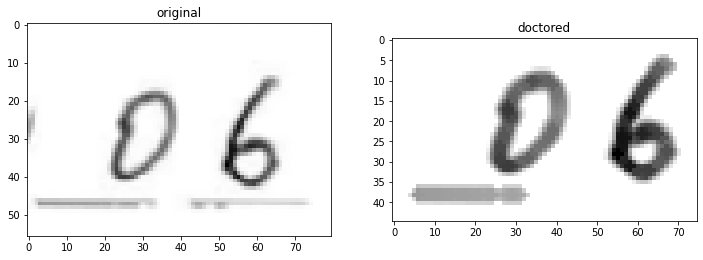

Command:
python /home/jupyter/SimpleHTR/src/main.py --file /home/jupyter/image_registration/cropped_imgs/numeric_1_speciman_collection_date_day_doctored.png --wordbeamsearch --char /home/jupyter/SimpleHTR/test/numerals.txt --corpus /home/jupyter/SimpleHTR/test/days.txt
Output:
Recognized: "'6"
Probability: 0.3859349

Best semi-hacky prediction: '6





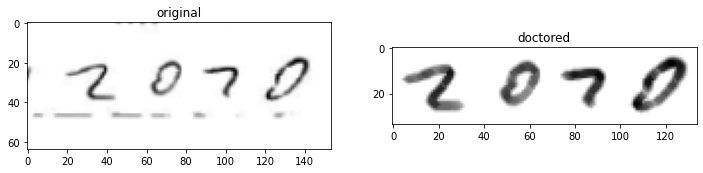

Command:
python /home/jupyter/SimpleHTR/src/main.py --file /home/jupyter/image_registration/cropped_imgs/numeric_2_speciman_collection_date_year_doctored.png --wordbeamsearch --char /home/jupyter/SimpleHTR/test/numerals.txt --corpus /home/jupyter/SimpleHTR/test/years.txt
Output:
Recognized: "2020"
Probability: 0.12865968

Best semi-hacky prediction: 2020





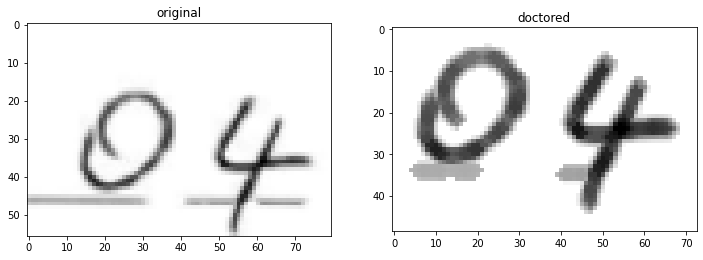

Command:
python /home/jupyter/SimpleHTR/src/main.py --file /home/jupyter/image_registration/cropped_imgs/numeric_1_speciman_collection_date_month_doctored.png --wordbeamsearch --char /home/jupyter/SimpleHTR/test/numerals.txt --corpus /home/jupyter/SimpleHTR/test/months.txt
Output:
Recognized: "vy"
Probability: 0.15940078

Best semi-hacky prediction: v4





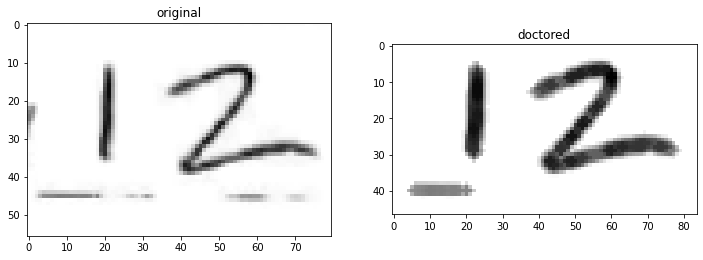

Command:
python /home/jupyter/SimpleHTR/src/main.py --file /home/jupyter/image_registration/cropped_imgs/numeric_3_speciman_collection_date_day_doctored.png --wordbeamsearch --char /home/jupyter/SimpleHTR/test/numerals.txt --corpus /home/jupyter/SimpleHTR/test/days.txt
Output:
Recognized: "I2"
Probability: 0.80932623

Best semi-hacky prediction: 12





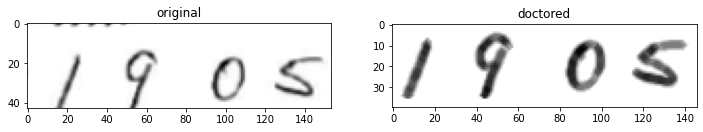

Command:
python /home/jupyter/SimpleHTR/src/main.py --file /home/jupyter/image_registration/cropped_imgs/numeric_2_date_of_birth_year_doctored.png --wordbeamsearch --char /home/jupyter/SimpleHTR/test/numerals.txt --corpus /home/jupyter/SimpleHTR/test/years.txt
Output:
Recognized: "1905"
Probability: 0.4286138

Best semi-hacky prediction: 1905





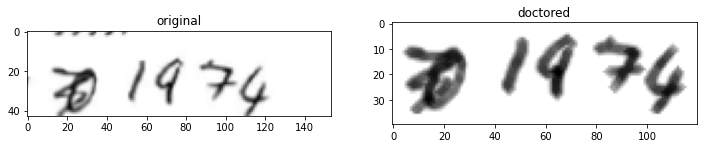

Command:
python /home/jupyter/SimpleHTR/src/main.py --file /home/jupyter/image_registration/cropped_imgs/numeric_1_date_of_birth_year_doctored.png --wordbeamsearch --char /home/jupyter/SimpleHTR/test/numerals.txt --corpus /home/jupyter/SimpleHTR/test/years.txt
Output:
Recognized: "p1934"
Probability: 0.002472516

Best semi-hacky prediction: p1934





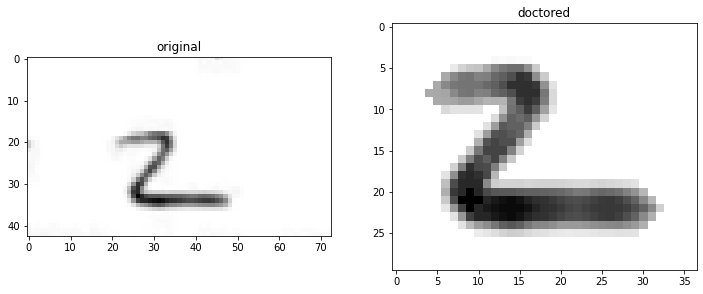

Command:
python /home/jupyter/SimpleHTR/src/main.py --file /home/jupyter/image_registration/cropped_imgs/numeric_3_date_of_birth_day_doctored.png --wordbeamsearch --char /home/jupyter/SimpleHTR/test/numerals.txt --corpus /home/jupyter/SimpleHTR/test/days.txt


In [ ]:
for file in numeric_files:

    if 'doctored' in file:
        continue
    
    if 'month' in file:
        corpus_file = '/home/jupyter/SimpleHTR/test/months.txt'
    elif 'day' in file:
        corpus_file = '/home/jupyter/SimpleHTR/test/days.txt'
    elif 'year' in file:
        corpus_file = '/home/jupyter/SimpleHTR/test/years.txt'
    else:
        continue
        
    img = imread(file)
    doctored_img = dejunkify(img, thicken=True)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('original')
    plt.subplot(1, 2, 2)
    plt.imshow(doctored_img, cmap='gray')
    plt.title('doctored')
    plt.show()
    
    out_file = file[:-4] + '_doctored.png'
    imsave(out_file, doctored_img)
    
    command = ['python', '/home/jupyter/SimpleHTR/src/main.py', 
                '--file', out_file, '--wordbeamsearch', 
                '--char', '/home/jupyter/SimpleHTR/test/numerals.txt', 
                '--corpus', corpus_file]
    
    print('Command:')
    print(' '.join(command))
    
    proc = subprocess.Popen(command, 
                            stdout=subprocess.PIPE, 
                            stderr=subprocess.STDOUT)
    stdout, stderr = proc.communicate()
    print('Output:')
    out_string = '\n'.join(str(stdout, encoding='UTF-8').split('\n')[-3:])
    print(out_string)
    
    # rule-based coercion to numbers... this is so hacky
    prediction = ''.join(out_string.split('"')[1:-1])
    
    # the hacky rules
    prediction = prediction.replace('o', '0')
    prediction = prediction.replace('D', '0')
    prediction = prediction.replace('l', '1')
    prediction = prediction.replace('i', '1')
    prediction = prediction.replace('I', '1')
    prediction = prediction.replace('y', '4')
    prediction = prediction.replace('f', '4')
    prediction = prediction.replace('t', '4')
    prediction = prediction.replace('s', '5')
    
    # TODO: if we can actually get the wordbeamsearch to work correctly, we won't need this
    print('Best semi-hacky prediction: ' + prediction)
    
    print('\n\n')

# Alphanumerics

Lesson learned: you have to be _very_ careful about image prep and cropping and making sure there is one word per prediction.

In [228]:
alphanumeric_files = glob.glob('/home/jupyter/image_registration/cropped_imgs/alphanumeric*')
alphanumeric_files[:5]

['/home/jupyter/image_registration/cropped_imgs/alphanumeric_1_swab_tube_barcode_label.png',
 '/home/jupyter/image_registration/cropped_imgs/alphanumeric_3_requesting_physician_email_doctored.png',
 '/home/jupyter/image_registration/cropped_imgs/alphanumeric_1_first_name.png',
 '/home/jupyter/image_registration/cropped_imgs/alphanumeric_2_last_name.png',
 '/home/jupyter/image_registration/cropped_imgs/alphanumeric_1_last_name_doctored.png']

/home/jupyter/image_registration/cropped_imgs/alphanumeric_1_first_name.png


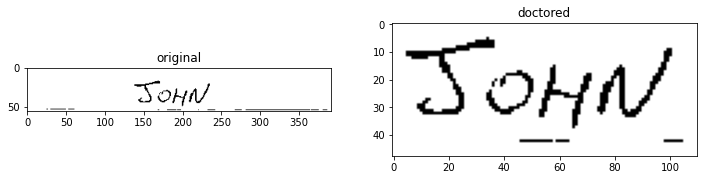

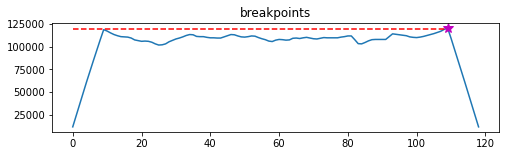

[0:109]


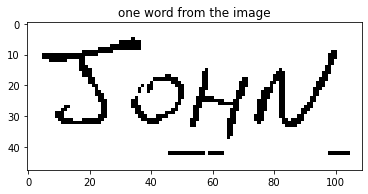

Command:
python /home/jupyter/SimpleHTR/src/main.py --file /home/jupyter/image_registration/cropped_imgs/alphanumeric_1_first_name_doctored.png --beamsearch
Output:
Recognized: "sorN"
Probability: 0.032367587

[109:110]
Best prediction: sorN



/home/jupyter/image_registration/cropped_imgs/alphanumeric_2_last_name.png


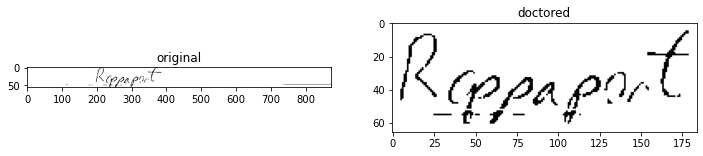

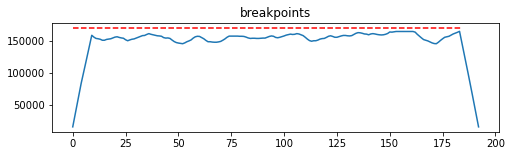

[0:184]


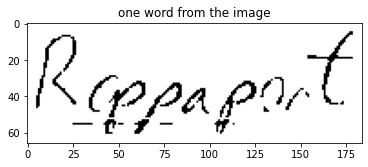

Command:
python /home/jupyter/SimpleHTR/src/main.py --file /home/jupyter/image_registration/cropped_imgs/alphanumeric_2_last_name_doctored.png --beamsearch
Output:
Recognized: "Reppapnt"
Probability: 0.05177727

Best prediction: Reppapnt



/home/jupyter/image_registration/cropped_imgs/alphanumeric_4_facility_code.png
Error.........
/home/jupyter/image_registration/cropped_imgs/alphanumeric_1_facility_name.png


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: Mean of empty slice.
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


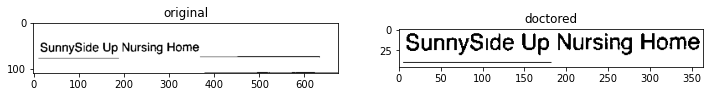

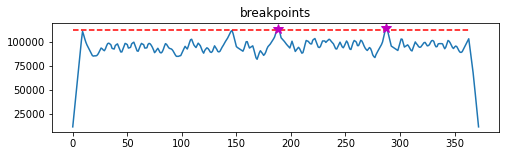

[0:188]


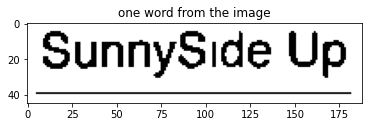

Command:
python /home/jupyter/SimpleHTR/src/main.py --file /home/jupyter/image_registration/cropped_imgs/alphanumeric_1_facility_name_doctored.png --beamsearch
Output:
Recognized: "Sunnysideve"
Probability: 0.13813174

[188:287]


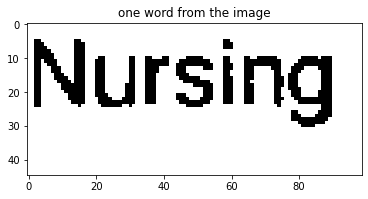

Output:
Recognized: "Nursing"
Probability: 0.84851414

[287:364]


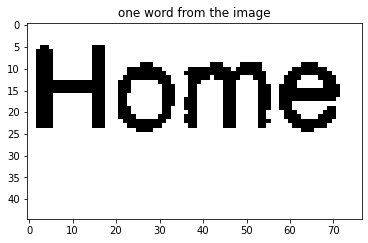

Output:
Recognized: "Home"
Probability: 0.79281217

Best prediction: Sunnysideve Nursing Home



/home/jupyter/image_registration/cropped_imgs/alphanumeric_4_middle_name.png


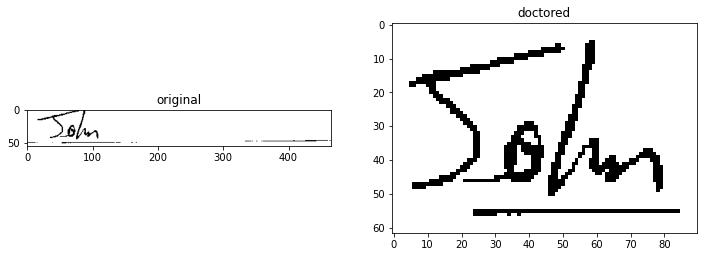

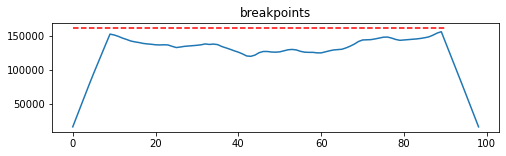

[0:90]


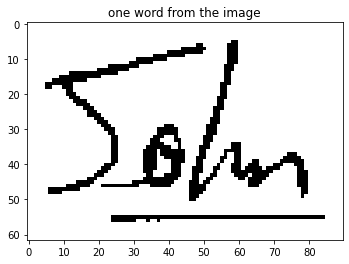

Command:
python /home/jupyter/SimpleHTR/src/main.py --file /home/jupyter/image_registration/cropped_imgs/alphanumeric_4_middle_name_doctored.png --beamsearch
Output:
Recognized: "Sels"
Probability: 0.06673979

Best prediction: Sels



/home/jupyter/image_registration/cropped_imgs/alphanumeric_4_requesting_physician_npi.png
Error.........
/home/jupyter/image_registration/cropped_imgs/alphanumeric_3_facility_name.png


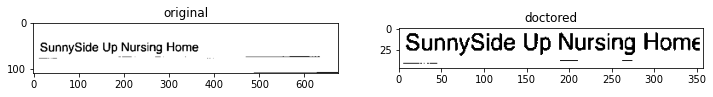

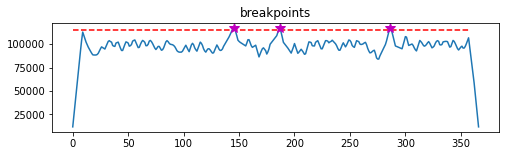

[0:145]


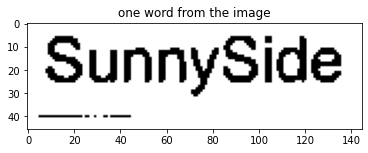

Command:
python /home/jupyter/SimpleHTR/src/main.py --file /home/jupyter/image_registration/cropped_imgs/alphanumeric_3_facility_name_doctored.png --beamsearch
Output:
Recognized: "sunnyside"
Probability: 0.61722976

[145:187]


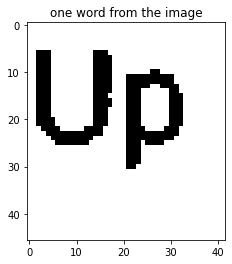

Output:
Recognized: "up"
Probability: 0.9266609

[187:286]


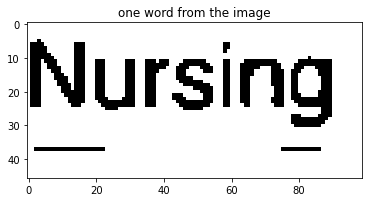

Output:
Recognized: "Nursing"
Probability: 0.6500264

[286:358]


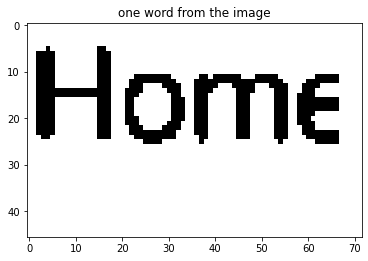

Output:
Recognized: "Home"
Probability: 0.35571703

Best prediction: sunnyside up Nursing Home



/home/jupyter/image_registration/cropped_imgs/alphanumeric_1_middle_name.png


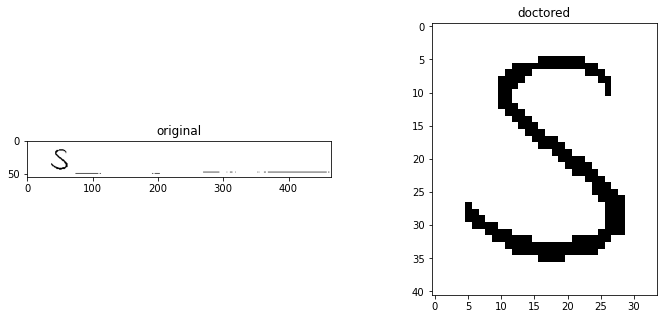

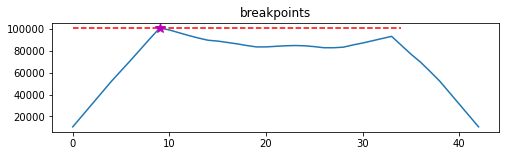

[0:9]
Best prediction: 



/home/jupyter/image_registration/cropped_imgs/alphanumeric_4_requesting_physician_email.png


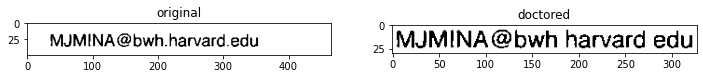

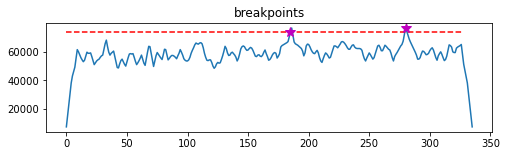

[0:185]


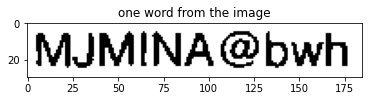

Command:
python /home/jupyter/SimpleHTR/src/main.py --file /home/jupyter/image_registration/cropped_imgs/alphanumeric_4_requesting_physician_email_doctored.png --beamsearch
Output:
Recognized: "mminaebwn"
Probability: 0.015185372

[185:280]


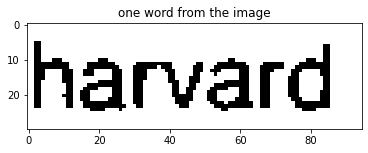

Output:
Recognized: "harvard"
Probability: 0.8877083

[280:327]


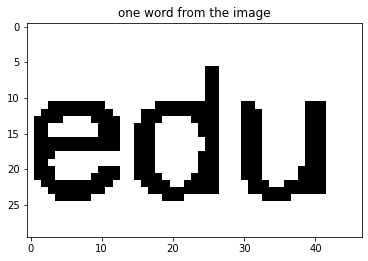

Output:
Recognized: "edu"
Probability: 0.25318164

Best prediction: mminaebwn harvard edu



/home/jupyter/image_registration/cropped_imgs/alphanumeric_1_requesting_physician_name.png


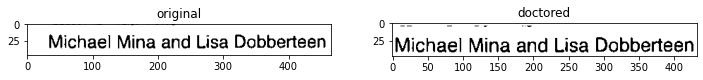

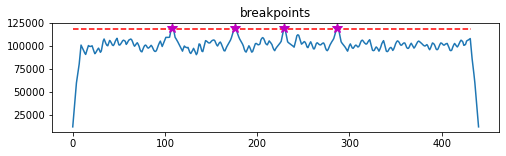

[0:108]


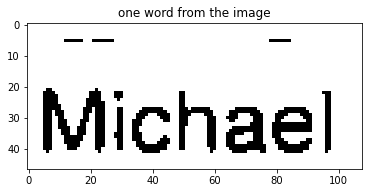

Command:
python /home/jupyter/SimpleHTR/src/main.py --file /home/jupyter/image_registration/cropped_imgs/alphanumeric_1_requesting_physician_name_doctored.png --beamsearch
Output:
Recognized: "ivicnael"
Probability: 0.11130134

[108:176]


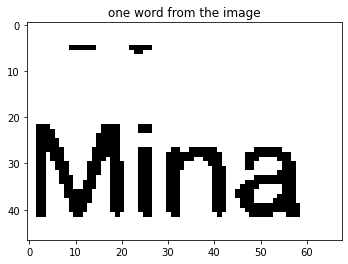

Output:
Recognized: "isina"
Probability: 0.3066507

[176:229]


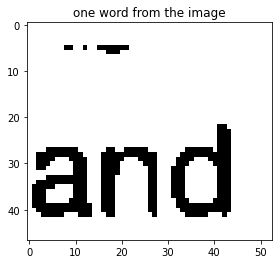

Output:
Recognized: "and"
Probability: 0.80871403

[229:287]


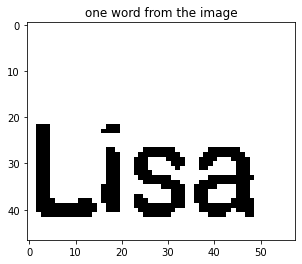

Output:
Recognized: "Lisa"
Probability: 0.24892715

[287:432]


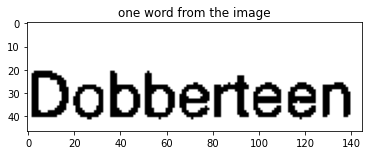

Output:
Recognized: "Dobberisen"
Probability: 0.04741357

Best prediction: ivicnael isina and Lisa Dobberisen



/home/jupyter/image_registration/cropped_imgs/alphanumeric_3_requesting_physician_npi.png
Error.........
/home/jupyter/image_registration/cropped_imgs/alphanumeric_3_requesting_physician_email.png


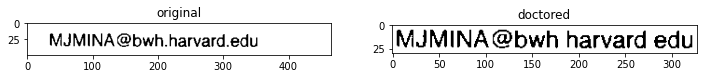

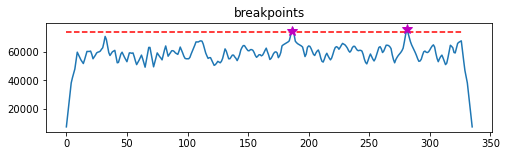

[0:186]


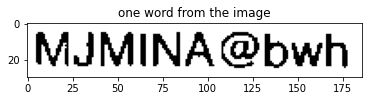

Command:
python /home/jupyter/SimpleHTR/src/main.py --file /home/jupyter/image_registration/cropped_imgs/alphanumeric_3_requesting_physician_email_doctored.png --beamsearch
Output:
Recognized: "mmintebwh"
Probability: 0.0010326081

[186:281]


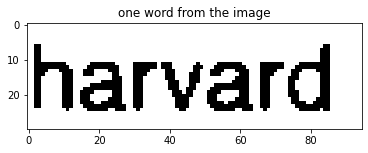

Output:
Recognized: "harvard"
Probability: 0.87130874

[281:327]


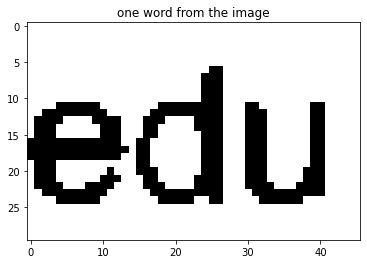

Output:
Recognized: "edu"
Probability: 0.15175733

Best prediction: mmintebwh harvard edu



/home/jupyter/image_registration/cropped_imgs/alphanumeric_4_requesting_physician_name.png


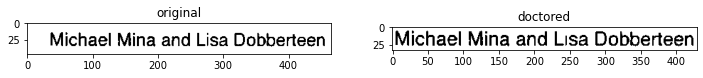

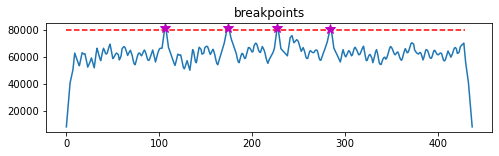

[0:106]


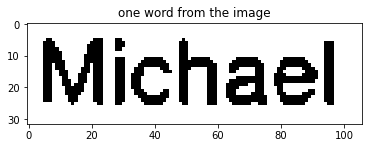

Command:
python /home/jupyter/SimpleHTR/src/main.py --file /home/jupyter/image_registration/cropped_imgs/alphanumeric_4_requesting_physician_name_doctored.png --beamsearch
Output:
Recognized: "Michaal"
Probability: 0.056023795

[106:174]


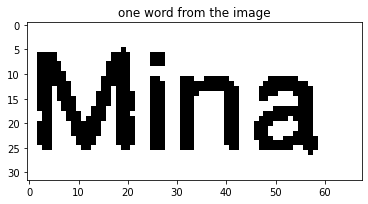

Output:
Recognized: "Nina"
Probability: 0.054475658

[174:227]


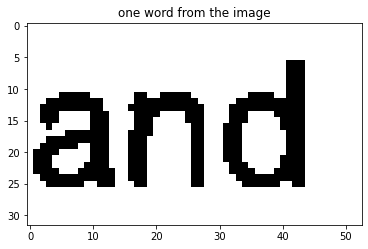

Output:
Recognized: "snd"
Probability: 0.2851069

[227:284]


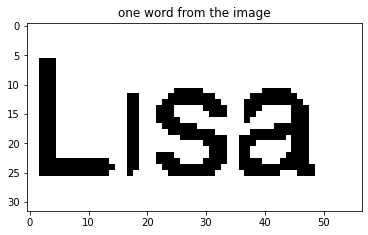

Output:
Recognized: "Lise"
Probability: 0.2102048

[284:429]


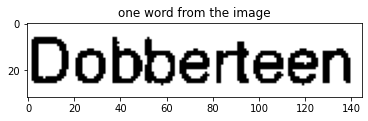

Output:
Recognized: "Dobberteen"
Probability: 0.2493489

Best prediction: Michaal Nina snd Lise Dobberteen



/home/jupyter/image_registration/cropped_imgs/alphanumeric_2_requesting_physician_npi.png
Error.........
/home/jupyter/image_registration/cropped_imgs/alphanumeric_3_requesting_physician_name.png


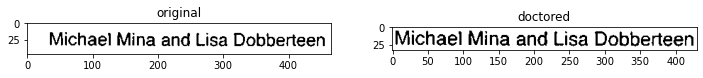

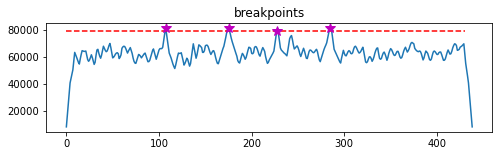

[0:107]


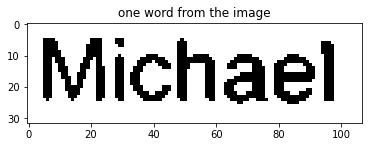

Command:
python /home/jupyter/SimpleHTR/src/main.py --file /home/jupyter/image_registration/cropped_imgs/alphanumeric_3_requesting_physician_name_doctored.png --beamsearch
Output:
Recognized: "michael"
Probability: 0.045670692

[107:175]


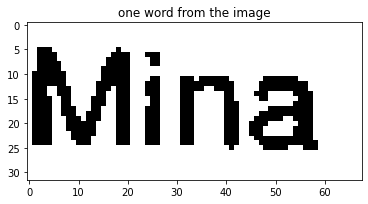

Output:
Recognized: "Aina"
Probability: 0.18785386

[175:227]


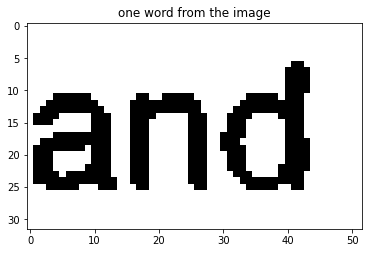

Output:
Recognized: "aried"
Probability: 0.05008983

[227:285]


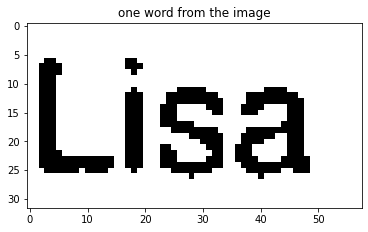

Output:
Recognized: "Lisie"
Probability: 0.16004819

[285:430]


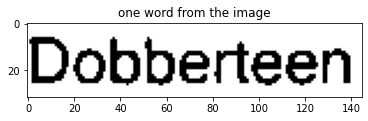

Output:
Recognized: "Dobberteen"
Probability: 0.3765574

Best prediction: michael Aina aried Lisie Dobberteen



/home/jupyter/image_registration/cropped_imgs/alphanumeric_1_last_name.png


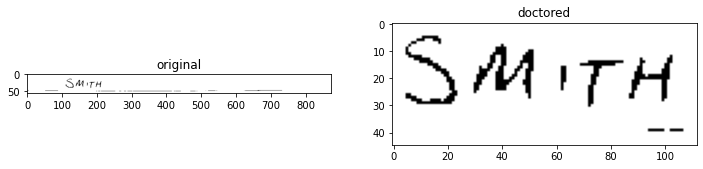

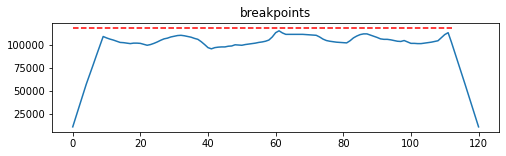

[0:112]


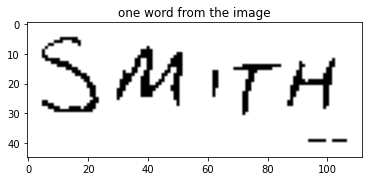

Command:
python /home/jupyter/SimpleHTR/src/main.py --file /home/jupyter/image_registration/cropped_imgs/alphanumeric_1_last_name_doctored.png --beamsearch
Output:
Recognized: "SMITt"
Probability: 0.035323042

Best prediction: SMITt



/home/jupyter/image_registration/cropped_imgs/alphanumeric_4_last_name.png


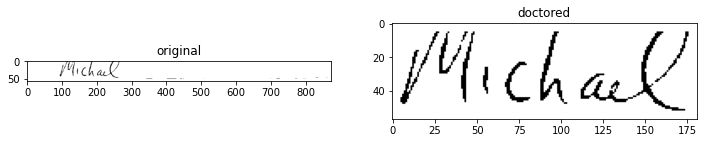

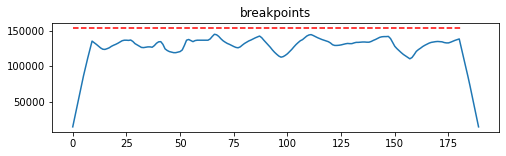

[0:181]


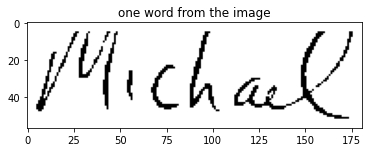

Command:
python /home/jupyter/SimpleHTR/src/main.py --file /home/jupyter/image_registration/cropped_imgs/alphanumeric_4_last_name_doctored.png --beamsearch
Output:
Recognized: "flichak"
Probability: 0.01801952

Best prediction: flichak



/home/jupyter/image_registration/cropped_imgs/alphanumeric_1_facility_code.png
Error.........
/home/jupyter/image_registration/cropped_imgs/alphanumeric_3_facility_code.png
Error.........
/home/jupyter/image_registration/cropped_imgs/alphanumeric_1_requesting_physician_npi.png
Error.........
/home/jupyter/image_registration/cropped_imgs/alphanumeric_3_first_name.png


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: Mean of empty slice.
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


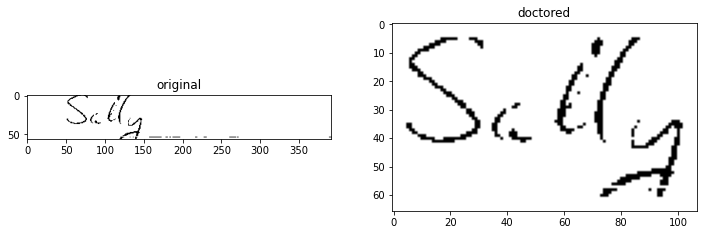

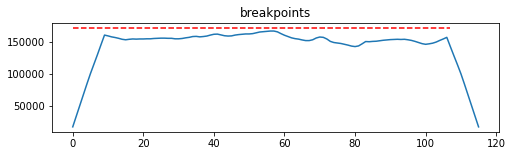

[0:107]


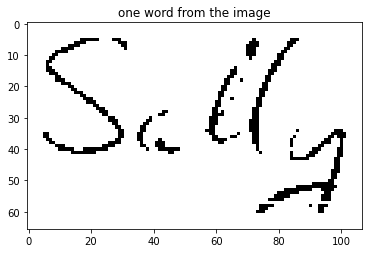

Command:
python /home/jupyter/SimpleHTR/src/main.py --file /home/jupyter/image_registration/cropped_imgs/alphanumeric_3_first_name_doctored.png --beamsearch
Output:
Recognized: "Sally"
Probability: 0.19266564

Best prediction: Sally



/home/jupyter/image_registration/cropped_imgs/alphanumeric_2_facility_code.png
Error.........
/home/jupyter/image_registration/cropped_imgs/alphanumeric_3_middle_name.png


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: Mean of empty slice.
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


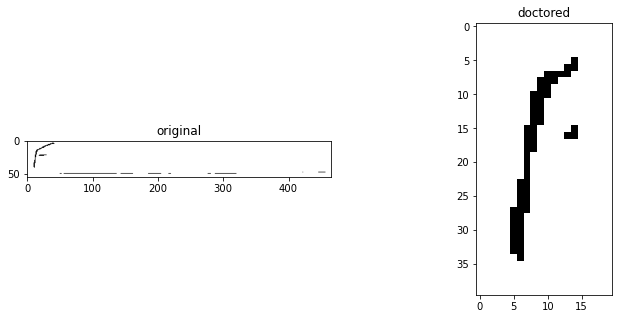

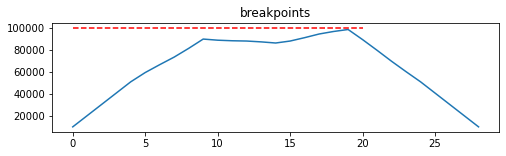

[0:20]


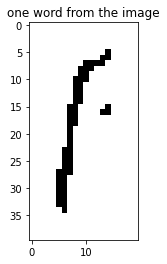

Command:
python /home/jupyter/SimpleHTR/src/main.py --file /home/jupyter/image_registration/cropped_imgs/alphanumeric_3_middle_name_doctored.png --beamsearch
Output:
Recognized: "I"
Probability: 0.44643494

Best prediction: I



/home/jupyter/image_registration/cropped_imgs/alphanumeric_2_facility_name.png


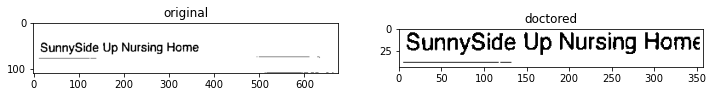

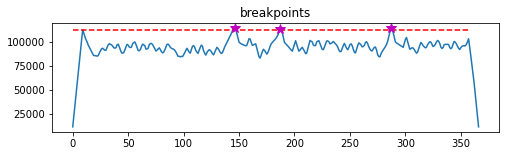

[0:146]


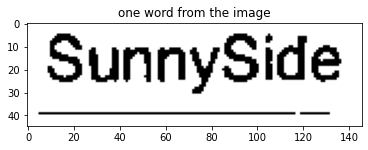

Command:
python /home/jupyter/SimpleHTR/src/main.py --file /home/jupyter/image_registration/cropped_imgs/alphanumeric_2_facility_name_doctored.png --beamsearch
Output:
Recognized: "sunnyside"
Probability: 0.1514981

[146:187]


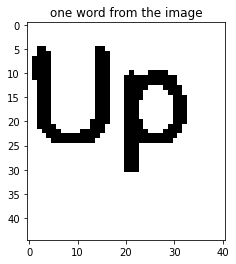

Output:
Recognized: "up"
Probability: 0.54794663

[187:287]


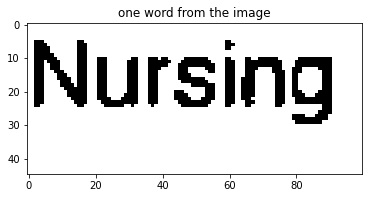

Output:
Recognized: "Nursing"
Probability: 0.65355176

[287:358]


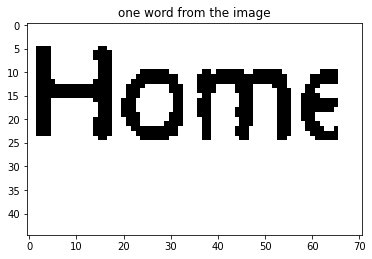

Output:
Recognized: "Home"
Probability: 0.6933457

Best prediction: sunnyside up Nursing Home



/home/jupyter/image_registration/cropped_imgs/alphanumeric_3_last_name.png


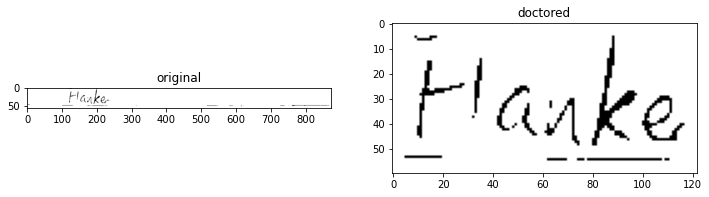

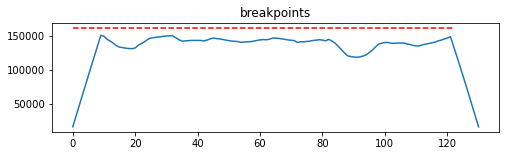

[0:122]


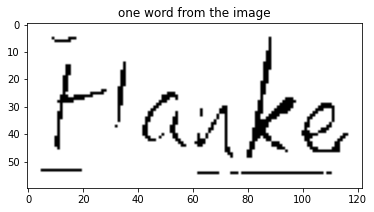

Command:
python /home/jupyter/SimpleHTR/src/main.py --file /home/jupyter/image_registration/cropped_imgs/alphanumeric_3_last_name_doctored.png --beamsearch
Output:
Recognized: "Flanke"
Probability: 0.21236292

Best prediction: Flanke



/home/jupyter/image_registration/cropped_imgs/alphanumeric_2_middle_name.png


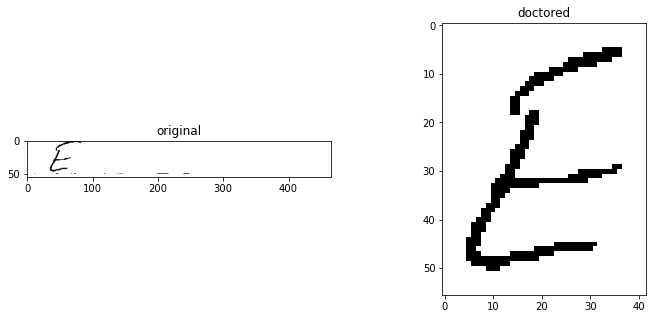

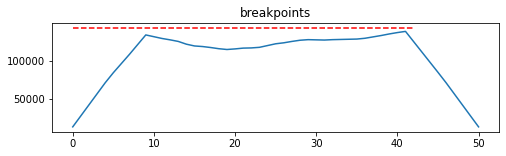

[0:42]


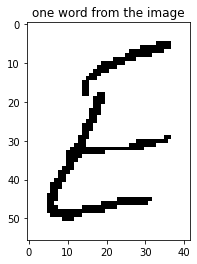

Command:
python /home/jupyter/SimpleHTR/src/main.py --file /home/jupyter/image_registration/cropped_imgs/alphanumeric_2_middle_name_doctored.png --beamsearch
Output:
Recognized: "I"
Probability: 0.6884989

Best prediction: I



/home/jupyter/image_registration/cropped_imgs/alphanumeric_2_requesting_physician_name.png


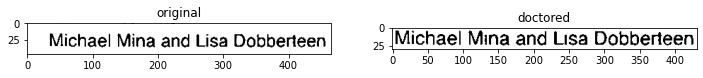

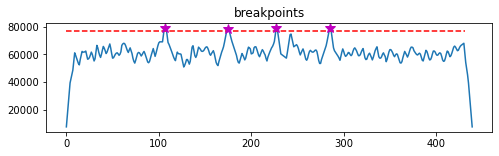

[0:107]


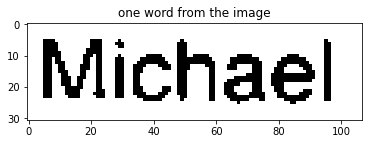

Command:
python /home/jupyter/SimpleHTR/src/main.py --file /home/jupyter/image_registration/cropped_imgs/alphanumeric_2_requesting_physician_name_doctored.png --beamsearch
Output:
Recognized: "michael"
Probability: 0.2906588

[107:175]


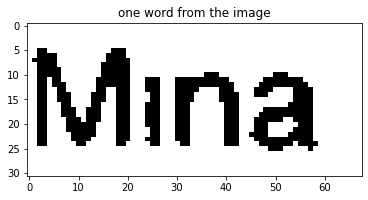

Output:
Recognized: "Mina"
Probability: 0.20537354

[175:227]


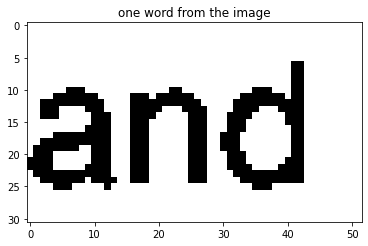

Output:
Recognized: "and"
Probability: 0.9752742

[227:285]


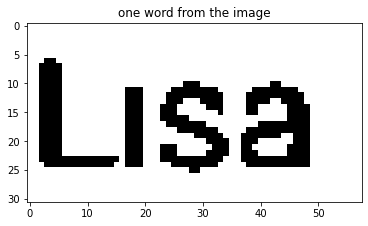

Output:
Recognized: "Lise"
Probability: 0.17837289

[285:431]


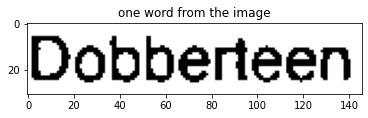

Output:
Recognized: "DObbereen"
Probability: 0.121829405

Best prediction: michael Mina and Lise DObbereen



/home/jupyter/image_registration/cropped_imgs/alphanumeric_4_first_name.png


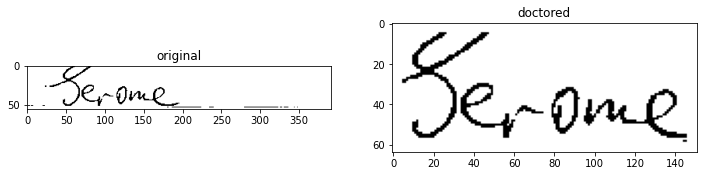

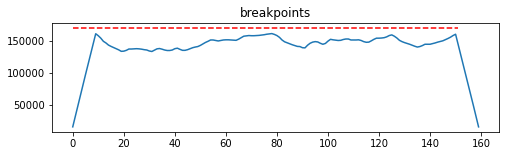

[0:151]


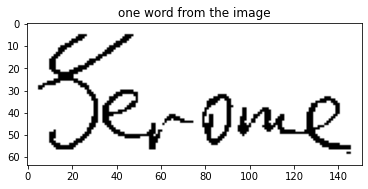

Command:
python /home/jupyter/SimpleHTR/src/main.py --file /home/jupyter/image_registration/cropped_imgs/alphanumeric_4_first_name_doctored.png --beamsearch
Output:
Recognized: "Serome"
Probability: 0.34853894

Best prediction: Serome



/home/jupyter/image_registration/cropped_imgs/alphanumeric_2_requesting_physician_email.png


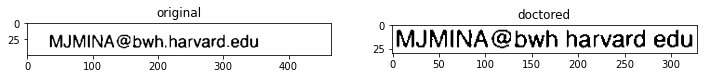

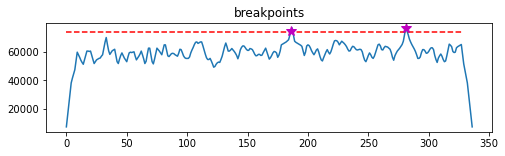

[0:186]


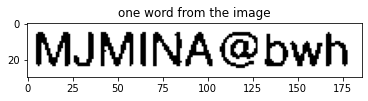

Command:
python /home/jupyter/SimpleHTR/src/main.py --file /home/jupyter/image_registration/cropped_imgs/alphanumeric_2_requesting_physician_email_doctored.png --beamsearch
Output:
Recognized: "mmnaeown"
Probability: 0.0015397236

[186:281]


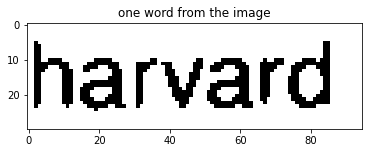

Output:
Recognized: "harvard"
Probability: 0.9515153

[281:328]


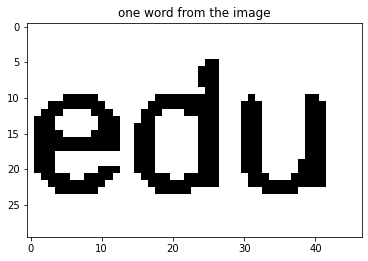

Output:
Recognized: "aedu"
Probability: 0.12757559

Best prediction: mmnaeown harvard aedu



/home/jupyter/image_registration/cropped_imgs/alphanumeric_1_requesting_physician_email.png


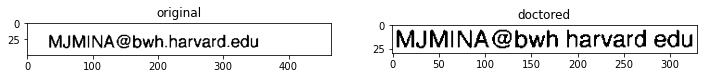

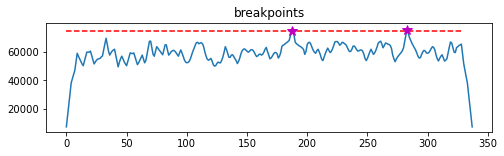

[0:187]


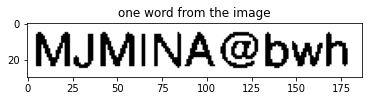

Command:
python /home/jupyter/SimpleHTR/src/main.py --file /home/jupyter/image_registration/cropped_imgs/alphanumeric_1_requesting_physician_email_doctored.png --beamsearch
Output:
Recognized: "mminkeown"
Probability: 0.001563304

[187:283]


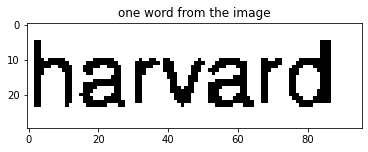

Output:
Recognized: "harvard"
Probability: 0.88017553

[283:329]


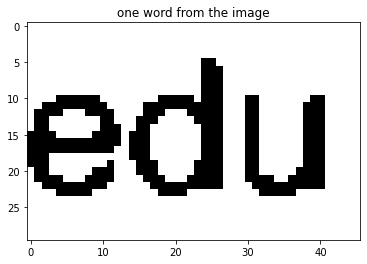

Output:
Recognized: "edu"
Probability: 0.47712976

Best prediction: mminkeown harvard edu



/home/jupyter/image_registration/cropped_imgs/alphanumeric_4_facility_name.png


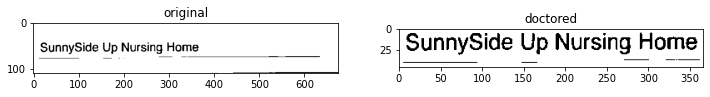

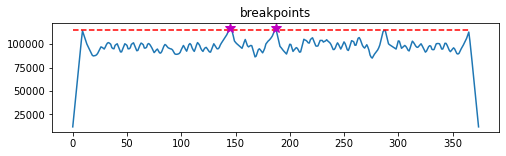

[0:145]


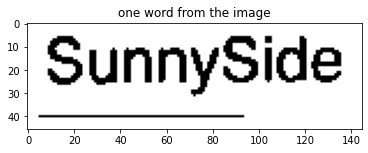

Command:
python /home/jupyter/SimpleHTR/src/main.py --file /home/jupyter/image_registration/cropped_imgs/alphanumeric_4_facility_name_doctored.png --beamsearch
Output:
Recognized: "sunnyside"
Probability: 0.7368926

[145:187]


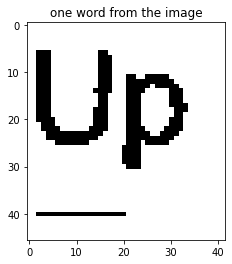

Output:
Recognized: "up"
Probability: 0.39233267

[187:366]


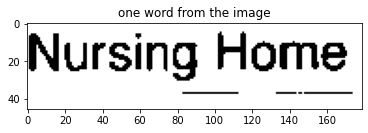

Output:
Recognized: "NursingHome"
Probability: 0.15216373

Best prediction: sunnyside up NursingHome



/home/jupyter/image_registration/cropped_imgs/alphanumeric_2_first_name.png


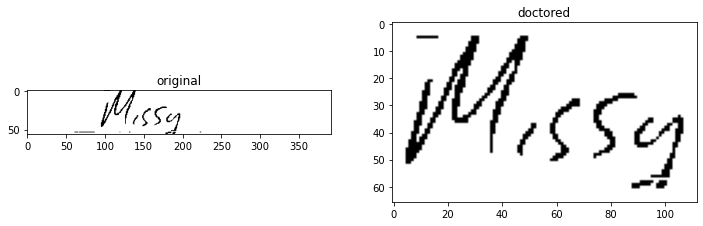

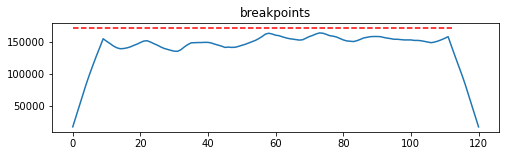

[0:112]


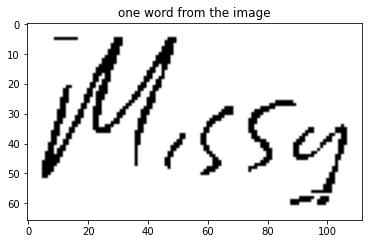

Command:
python /home/jupyter/SimpleHTR/src/main.py --file /home/jupyter/image_registration/cropped_imgs/alphanumeric_2_first_name_doctored.png --beamsearch
Output:
Recognized: "Altissy"
Probability: 0.043358047

Best prediction: Altissy





In [265]:
for file in alphanumeric_files:

    if 'doctored' in file:
        continue
    if 'barcode' in file:
        continue
        
    print(file)
    img = imread(file)
    
    try:
    
        # hacky width crop to remove trailing underlines
        col_sums = np.sum(img, axis=0)
        empty_colsum = 255 * img.shape[0]
        startcol = np.where(col_sums < empty_colsum * 0.9)[0][0] - 5
        endcol = np.where(col_sums < empty_colsum * 0.9)[0][-1] + 6
        img_crop = img[:, startcol:endcol]
    
        doctored_img = dejunkify(img_crop, thicken=False,
                                 multiplicative_safety_factor=0.1)
    except Exception:
        print('Error.........')
        continue

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('original')
    plt.subplot(1, 2, 2)
    plt.imshow(doctored_img, cmap='gray')
    plt.title('doctored')
    plt.show()
    
    # we now do this in batches, since the images are too large!
    # ... and this is supposed to be for single words
    
    # take windows for now, this is hacky
    # TODO: address this for real
    
    col_sums = np.sum(doctored_img, axis=0)
    empty_colsum = 255 * doctored_img.shape[0]
    # locate local minima
    convsize = 10
    col_sums = np.convolve(col_sums, np.ones(convsize))
    
    plt.figure(figsize=(8, 2))
    plt.plot(col_sums)
#     threshold = convsize * empty_colsum * 0.98
    threshold = np.mean(col_sums[10:-10]) + 3 * np.std(col_sums[10:-10])
    plt.plot([0, doctored_img.shape[1]], [threshold, threshold], 'r--')
    plt.title('breakpoints')
    
    # find the breakpoints where there are spaces between words
    breakpoints = []
    inds_above_threshold = np.where(col_sums > threshold)[0]
    
    from itertools import groupby
    from operator import itemgetter
    for k, g in groupby(enumerate(inds_above_threshold), lambda ix: ix[0] - ix[1]):
        breakpoints.append(int(np.median(list(map(itemgetter(1), g))).item()))
    
    plt.plot(breakpoints, col_sums[breakpoints], 'm*', ms=10)
    plt.show()
    breakpoints = [0] + breakpoints + [doctored_img.shape[1]]
    
    full_doctored_img = doctored_img.copy()
    
    predictions = []
    
    for i in range(len(breakpoints) - 1):
    
        out_file = file[:-4] + '_doctored.png'
        print(f'[{breakpoints[i]}:{breakpoints[i + 1]}]')
        
        doctored_img = full_doctored_img[:, breakpoints[i]:breakpoints[i + 1]].copy()
        if doctored_img.shape[1] < 10:
            break
            
        plt.imshow(doctored_img, cmap='gray')
        plt.title('one word from the image')
        plt.show()
            
        imsave(out_file, doctored_img)

        command = ['python', '/home/jupyter/SimpleHTR/src/main.py', 
                    '--file', out_file, '--beamsearch']

        if i == 0:
            print('Command:')
            print(' '.join(command))

        proc = subprocess.Popen(command, 
                                stdout=subprocess.PIPE, 
                                stderr=subprocess.STDOUT)
        stdout, stderr = proc.communicate()
        print('Output:')
        out_string = '\n'.join(str(stdout, encoding='UTF-8').split('\n')[-3:])
        print(out_string)

        prediction = ''.join(out_string.split('"')[1:-1])
        predictions.append(prediction)
    
    # TODO: if we can actually get the wordbeamsearch to work correctly, we won't need this
    print('Best prediction: ' + ' '.join(predictions))
    
    print('\n\n')